In [1]:
#Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

#plot
from qiskit.visualization import plot_histogram

In [7]:
#prepares the quantum circuit according to Alice's key and her bases
def prepareKey(aliceKey, aliceBases):
    for i in range(0, len(aliceKey)):
        if aliceBases[i] == 'x':
            if aliceKey[i] == 0:
                qc.h(qr[i])
            else:
                qc.x(qr[i])
                qc.h(qr[i])
        else:
            if aliceKey[i] == 1:
                qc.x(qr[i])

#measures key in Bob's prepared bases
def measureKey(bobBases):
    for i in range(0, len(bobBases)):
        if bobBases[i] == 'x':
            qc.h(qr[i])
    qc.barrier()
    qc.measure(qr,cr)

#takes the measurments, the bases and the samplesize removes qubits with different bases from key
#and returns dict of keys cut to the sample size
def getSampleDict(measurements, aliceBases, bobBases, sampleSize):
    measurementKeys = list(measurements.keys())
    for i in range(0, len(measurementKeys)):
        key = measurementKeys[i] 
        newKey = ""
        for j in range (0, len(key)):
            if aliceBases[len(key) - 1 - j] == bobBases[len(key) - 1 - j]:
                newKey += key[j]
        measurementKeys[i] = newKey[0:sampleSize]
    
    sample = {}
    for k in range(0, len(measurementKeys)):
        value = 0
        if measurementKeys[k] in sample:
            value = sample[measurementKeys[k]]
        sample[measurementKeys[k]] = value + list(answer.values())[k]      
    return sample

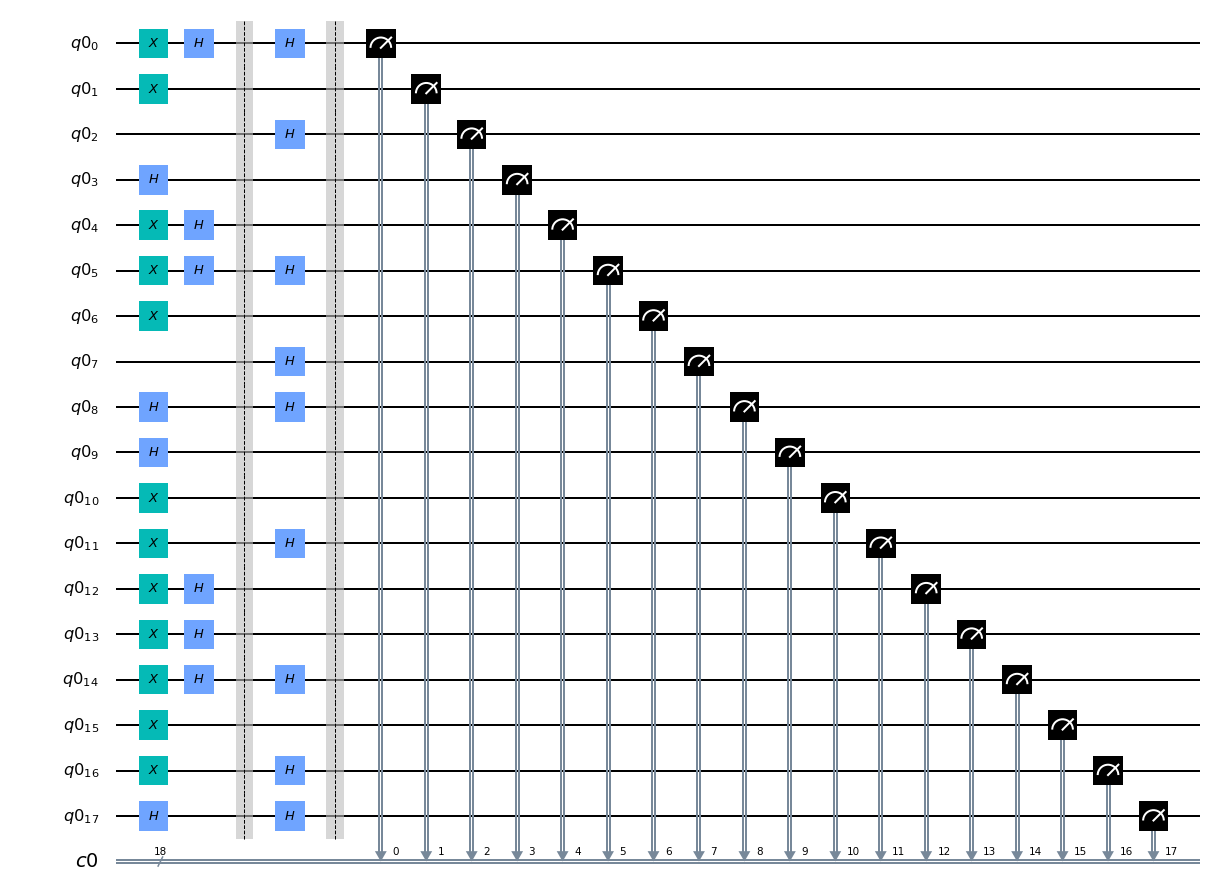

In [3]:
keyLength = 18
qr = QuantumRegister(keyLength)
cr = ClassicalRegister(keyLength)
qc = QuantumCircuit(qr, cr)

aliceKey = [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
aliceBases = ['x', 'z', 'z', 'x', 'x', 'x', 'z', 'z', 'x', 'x', 'z', 'z', 'x', 'x', 'x', 'z', 'z', 'x']

prepareKey(aliceKey, aliceBases)

qc.barrier()

bobBases = ['x', 'z', 'x', 'z', 'z', 'x', 'z', 'x', 'x', 'z', 'z', 'x', 'z', 'z', 'x', 'z', 'x', 'x']

measureKey(bobBases)


#qc.draw(output="mpl")

{'01110': 1024}


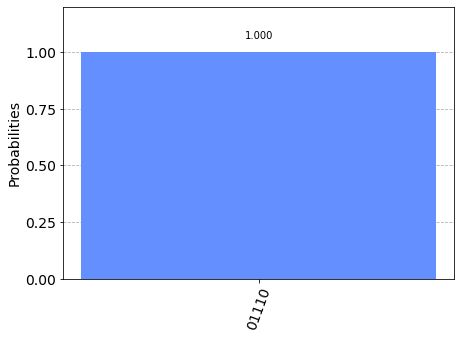

In [11]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()  
#print(answer)
newAnswer = getSampleDict(answer, aliceBases, bobBases, 5)
print(newAnswer)

plot_histogram(newAnswer)

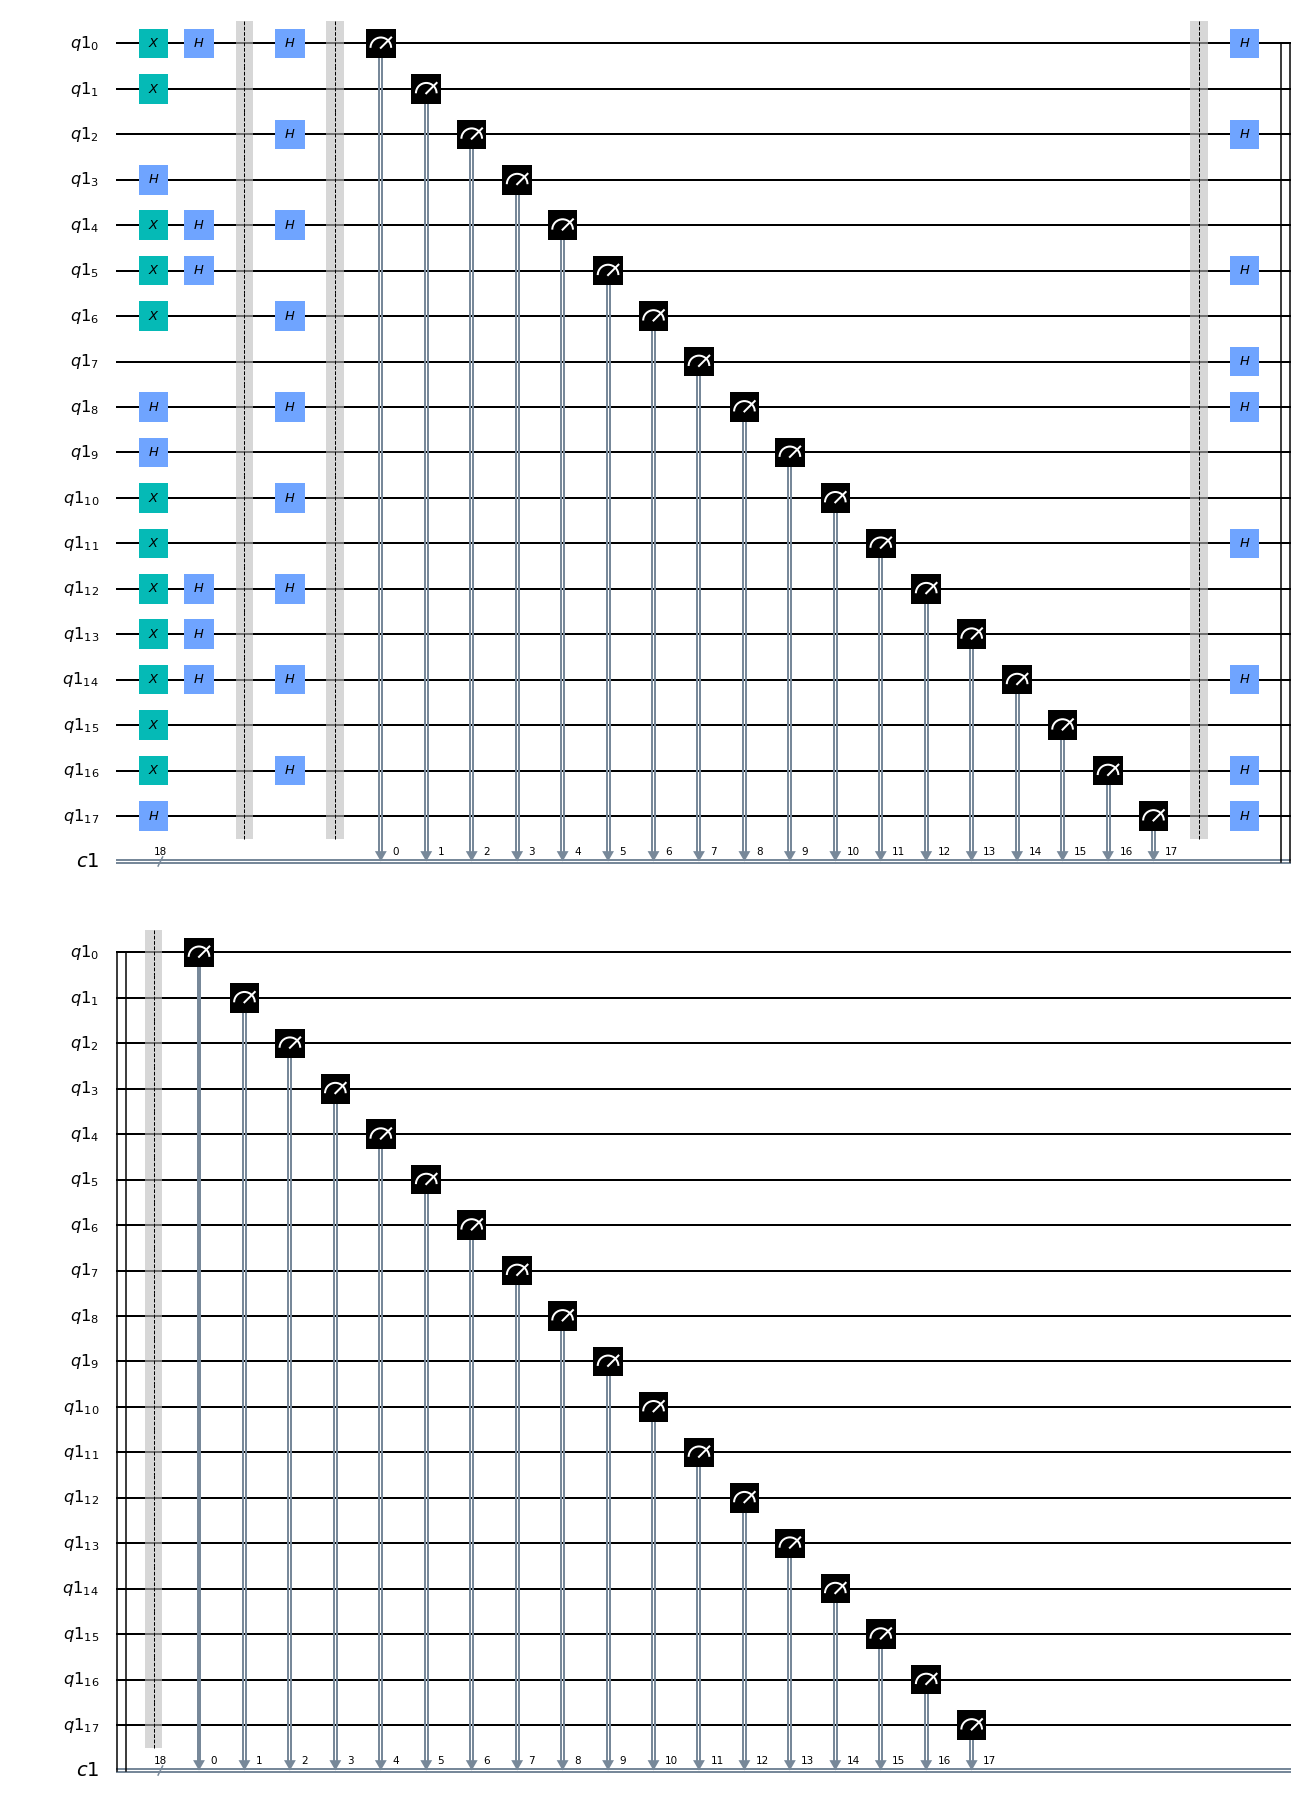

In [12]:
qr = QuantumRegister(keyLength)
cr = ClassicalRegister(keyLength)
qc = QuantumCircuit(qr, cr)

prepareKey(aliceKey, aliceBases)

qc.barrier()

#interference in alternating bases
for i in range(0, keyLength):
    if i%2 == 0:
        qc.h(qr[i])
qc.barrier()
qc.measure(qr, cr)

qc.barrier()

measureKey(bobBases)


#qc.draw(output="mpl")

{'01011': 63, '11110': 63, '01010': 74, '11000': 63, '11100': 61, '11011': 70, '01001': 65, '11010': 60, '01100': 62, '01111': 52, '01000': 72, '01101': 60, '01110': 82, '11101': 57, '11001': 57, '11111': 63}


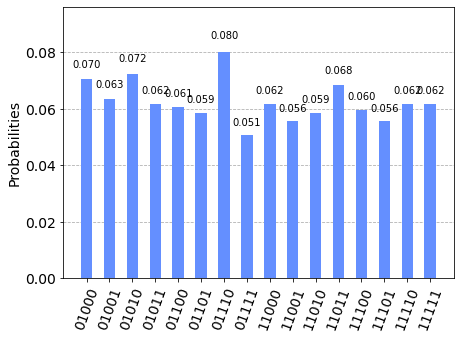

In [13]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()  
#print(answer)
newAnswer = getSampleDict(answer, aliceBases, bobBases, 5)
print(newAnswer)

plot_histogram(newAnswer)